### Importing packages/libraries for reading the json files, converting frames to datagrams and plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

### Reading the .json files generated by the VMAF library of the ffmpeg

In [2]:
LIST_OF_FILES = ["log_vmaf_h264.json","log_vmaf_h265.json","log_vmaf_VP9.json"]

video_quality_df = pd.DataFrame()

i=0
for filename in LIST_OF_FILES:
    print(filename)
    
    encoder = ["h264","h265","VP9"][i] #defining encoder names
    i+=1

    with open(filename,"r") as f:    
        json_file = f.read() # read json file as a str
        
    json_file = re.sub(r'-nan', 'NaN', json_file) #disregard NaN values seen, i.e. for ssim variable

    #convert string to dictionary, using json library
    parsed_json = (json.loads(json_file)) 
    
    new_video_quality_df = pd.DataFrame() #initialise dataframe

    for frame in parsed_json["frames"]:

        frame["metrics"]["encoder"] = encoder

        new_video_quality_df = new_video_quality_df.append(pd.DataFrame(frame["metrics"],index=[frame["frameNum"]] ))
        #append each frame onto the master dataframe.

    new_video_quality_df["frame_number"] = new_video_quality_df.index
    
    video_quality_df = video_quality_df.append(new_video_quality_df)
       

log_vmaf_h264.json
log_vmaf_h265.json
log_vmaf_VP9.json


### ------------ Please wait for previous set to be comlpeted, python is reading all 3 datagrams ------------

### Data visualization of the datagrams containig the json outputs

In [3]:
video_quality_df

,adm2,motion2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,encoder,frame_number
0,0.92988,0.00000,0.99096,43.86241,0.98985,0.96513,0.99394,0.99752,0.99885,82.00601,h264,0
1,0.93013,0.00000,0.99097,43.85642,0.98983,0.96544,0.99395,0.99751,0.99885,82.05856,h264,1
2,0.96289,7.33921,0.98537,32.98323,0.97262,0.46903,0.87395,0.93478,0.96306,92.39097,h264,2
3,0.95653,7.33277,0.98345,32.07083,0.96890,0.44201,0.85598,0.92454,0.95763,90.20120,h264,3
4,0.95509,7.33277,0.98352,32.09663,0.96880,0.44515,0.85488,0.92254,0.95561,89.65429,h264,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7063,0.91248,0.00000,0.95768,32.34033,0.92317,0.38953,0.68493,0.81351,0.88993,64.61953,VP9,7063
7064,0.94138,0.00000,0.97694,35.36331,0.95648,0.49568,0.81401,0.90621,0.94832,77.08597,VP9,7064
7065,0.94138,0.00000,0.97694,35.36331,0.95648,0.49568,0.81401,0.90621,0.94832,77.08597,VP9,7065
7066,0.94134,0.00000,0.97694,35.36239,0.95647,0.49566,0.81391,0.90608,0.94824,77.06754,VP9,7066


### Proceeding with plot operations using matplotlib

### VMAF metric for all encoders

h264
h265
VP9


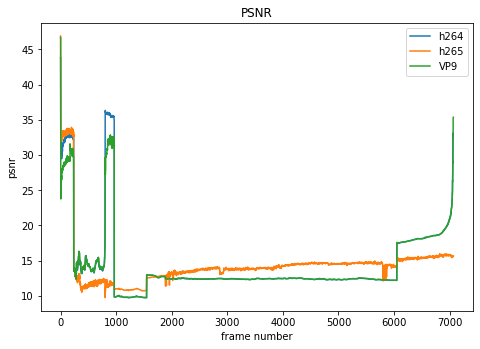

In [22]:
fig=plt.figure() #creating figure object
ax=fig.add_axes([0,0,1,1]) #defining axes

for encoder in video_quality_df.encoder.unique():
    print(encoder)
    plt.plot(video_quality_df[video_quality_df.encoder==encoder]["frame_number"], 
       # video_quality_df[video_quality_df.encoder==encoder]["vmaf"] ,  label=encoder) #original
        video_quality_df[video_quality_df.encoder==encoder]["psnr"] ,  label=encoder) #original

ax.set_xlabel('frame number') #horizontal axis
ax.set_ylabel("psnr") #vertical axis
ax.set_title('PSNR')
ax.legend()
#plt.savefig("vif_scale2_all_encoders.png") #save plot in local directory in .png format. 
#Change name if you don't desire to overwrite
plt.show()

### PSNR

h264
h265
VP9


D:\Anaconda\envs\IMS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


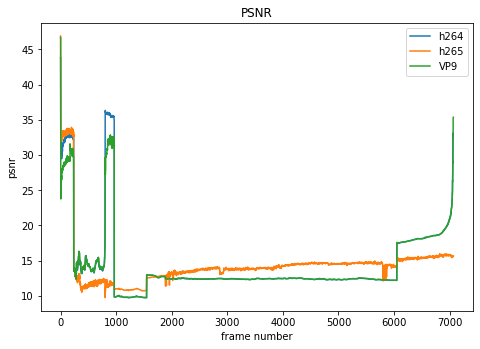

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

for encoder in video_quality_df.encoder.unique():
    print(encoder)
    plt.plot(video_quality_df[video_quality_df.encoder==encoder]["frame_number"],
        video_quality_df[video_quality_df.encoder==encoder]["psnr"] ,  label=encoder)
    
ax.set_xlabel('frame number') #horizontal axis
ax.set_ylabel("psnr") #vertical axis
ax.set_title('PSNR')
ax.legend()
plt.tight_layout()
plt.savefig("psnr_plot.png")
#please disregard warning shown below, the screenshots saved in local directory won't show the axes
plt.show()

### Ploting of individual quality metrics H.264

D:\Anaconda\envs\IMS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


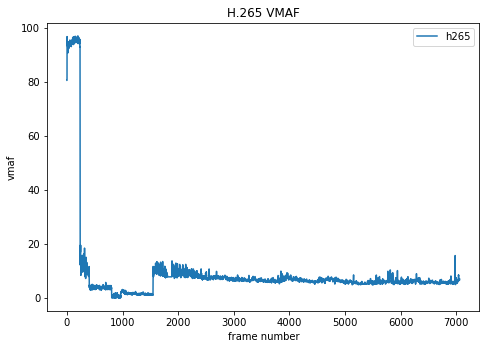

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

encoder = "h264"

plt.plot(video_quality_df[video_quality_df.encoder==encoder]["frame_number"], 
    video_quality_df[video_quality_df.encoder==encoder]["vmaf"] ,  label=encoder)
    
ax.set_xlabel('frame number') #horizonal axis
ax.set_ylabel("vmaf") # replace psnr with adm2 or motion2 or ms_ssim or ssim
ax.set_title('H.264 VMAF')
ax.legend()
plt.tight_layout()
#plt.savefig("H264_psnr_plot.png") # change name if you don't desire results to be overwritten
plt.show()

### Ploting of individual quality metrics for H.265

D:\Anaconda\envs\IMS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


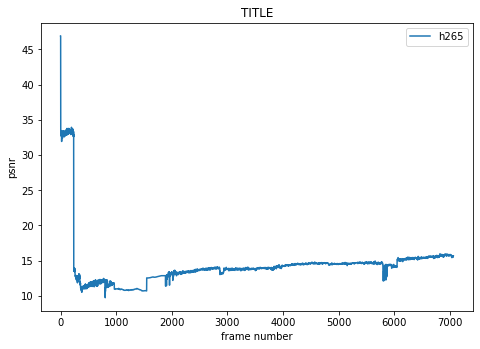

In [21]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

encoder = "h265"

plt.plot(video_quality_df[video_quality_df.encoder==encoder]["frame_number"],
    video_quality_df[video_quality_df.encoder==encoder]["psnr"] ,  label=encoder)
    
ax.set_xlabel('frame number')
ax.set_ylabel("psnr") # replace psnr with adm2 or motion2 or ms_ssim or ssim
ax.set_title('TITLE')
ax.legend()
plt.tight_layout()
plt.savefig("H265_psnr_plot.png") # change name if you don't desire results to be overwritten
plt.show()

### Ploting of individual quality metrics for VP9

D:\Anaconda\envs\IMS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


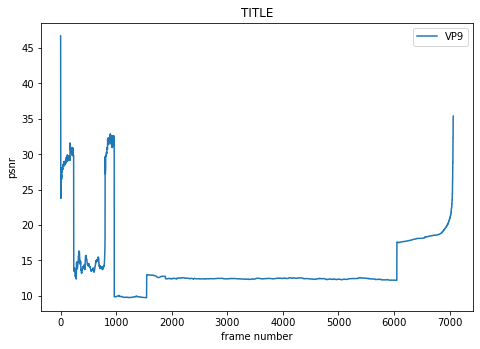

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

encoder = "VP9"

plt.plot(video_quality_df[video_quality_df.encoder==encoder]["frame_number"],
    video_quality_df[video_quality_df.encoder==encoder]["psnr"] ,  label=encoder)
    
ax.set_xlabel('frame number')
ax.set_ylabel("psnr") # replace psnr with adm2 or motion2 or ms_ssim or ssim
ax.set_title('TITLE')
ax.legend()
plt.tight_layout()
plt.savefig("VP9_psnr_plot.png") # change name if you don't desire results to be overwritten
plt.show()

### Histograms represantations of individual encoder

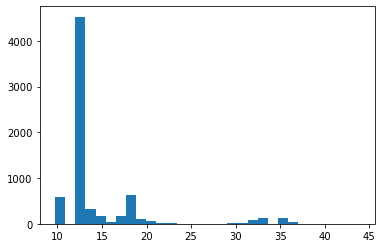

In [33]:
plt.hist(video_quality_df[video_quality_df.encoder==encoder]["psnr"],30)
plt.show()

### All encoders mean/avg/min/max metric values - Plot bars

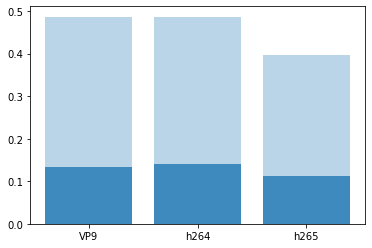

In [43]:
video_quality_by_encoder = video_quality_df.groupby("encoder")["adm2"].agg(["mean","std","min","max"])


plt.bar(video_quality_by_encoder.index, video_quality_by_encoder["mean"], color="C0",alpha=0.3) #less intense
plt.bar(video_quality_by_encoder.index, video_quality_by_encoder["std"], color="C0",alpha=0.8) #more intense
ax.set_xlabel('frame number')

ax.legend()
#plt.savefig("vmaf_bar.png")
plt.show()

### Raw values

In [25]:
video_quality_by_encoder

,mean,std,min,max
encoder,,,,
VP9,14.269390,4.652476,9.72316,46.69848
h264,14.446999,5.368286,9.72343,43.86241
h265,14.358024,3.775697,9.72962,46.91957
